# Gradient Descent

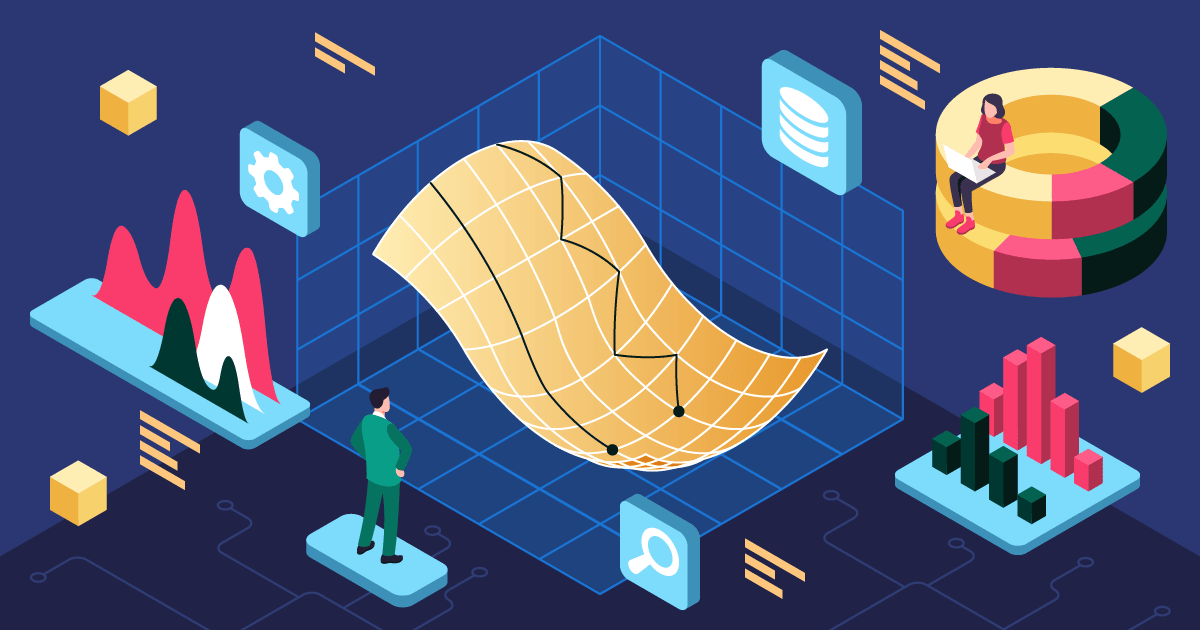

Gradient descent is a commonly used optimization algorithm for finding the minimum of a function. It is widely used in machine learning and other fields of optimization. The basic idea behind gradient descent is to iteratively adjust the parameters of a function in the direction of the negative gradient (or steepest descent) of the function with respect to those parameters.

The negative gradient of a function is the direction of the fastest decrease in the function. So, by moving in the opposite direction of the gradient, we can reach the minimum of the function. In gradient descent, we start with an initial guess for the parameters of the function, and then compute the gradient of the function with respect to these parameters. We then adjust the parameters in the direction of the negative gradient, which reduces the value of the function.

The step size of the adjustment is controlled by a parameter called the learning rate. If the learning rate is too small, the convergence will be very slow, and if the learning rate is too large, the algorithm may overshoot the minimum and diverge. Therefore, choosing an appropriate learning rate is crucial for the success of the gradient descent algorithm.

There are different variations of gradient descent such as batch gradient descent, stochastic gradient descent, and mini-batch gradient descent, which differ in the way they compute the gradient and update the parameters.

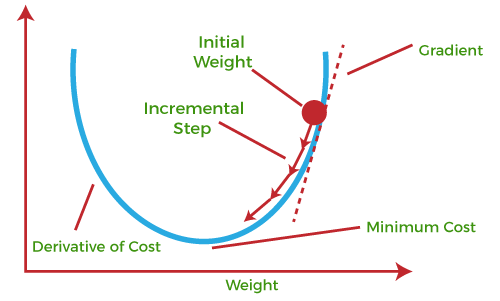

### learning rate
In gradient descent optimization algorithms, the learning rate is a hyperparameter that controls the step size at each iteration of the optimization process. It determines how much to adjust the model parameters with respect to the gradient of the loss function.

The learning rate can have a significant impact on the performance of the gradient descent algorithm. If the learning rate is too small, the optimization process will be slow, as the algorithm will take small steps towards the minimum of the loss function. On the other hand, if the learning rate is too large, the optimization process can be unstable and the algorithm may fail to converge to the minimum of the loss function.

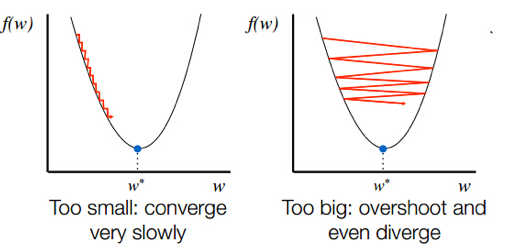

# Type of Gradient Descent
1. Batch Gradient Descent
2. Stochastic Gradient Descent
3. Mini-Batch Gradient Descent

# Gradient Descent for 2d Data

##### M = ? and B = ?
1. Intialise Random Value For M and B
2. Set Epochs loop
3. Set Learing Rate

#### Formula for Finding M and B

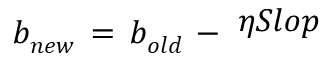

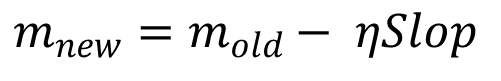

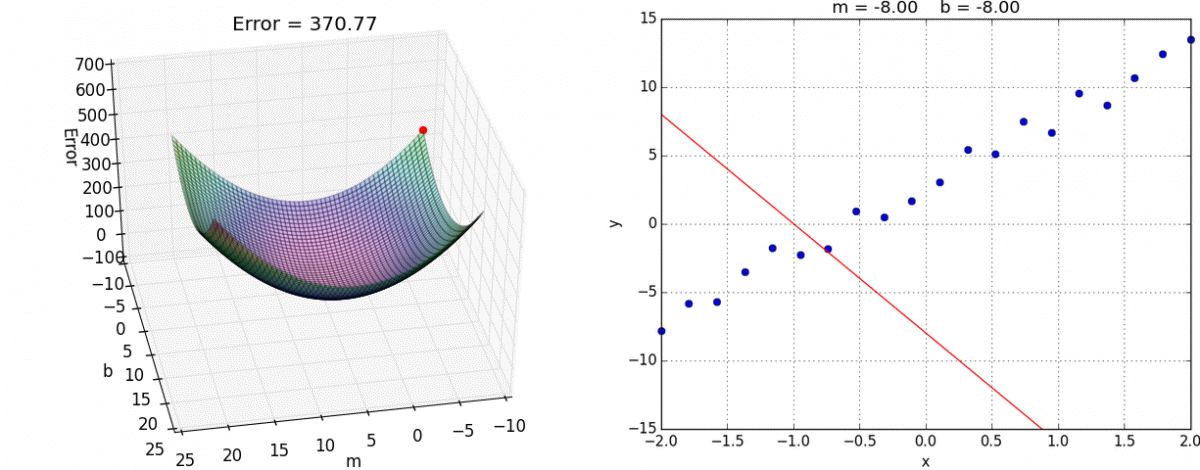

###### Error Function for linear Regression
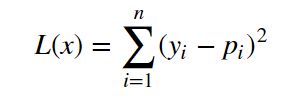
    
    y -> Actual Value 
    P -> Predicted Value

###### Error function for Gradient Descent
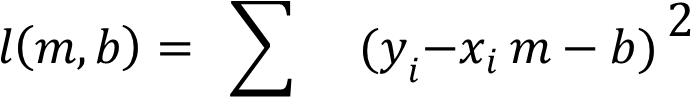

Finding Value of m and b where Lose function is Minimum 
##### Derivative the equation with respect to m and b


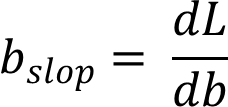



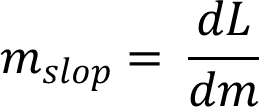



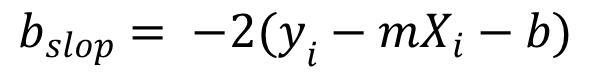
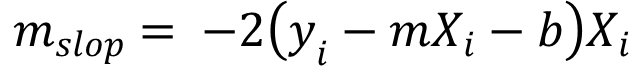

## Code for 2D Gradient Descent

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

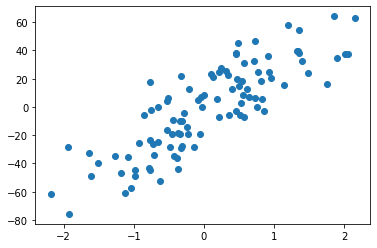

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [7]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [8]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self,X,y):
        # calcualte the b and m using GD
        for i in range(self.epochs):
            
            loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,"",self.b)
            
    def predict(self,X):
        return self.m * X + self.b
            

In [9]:
gd = GDRegressor(0.001,50)

In [10]:
gd.fit(X_train,y_train)

28.159367347119066  -2.3004574196824854


In [11]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579

# Batch Gradient Descent

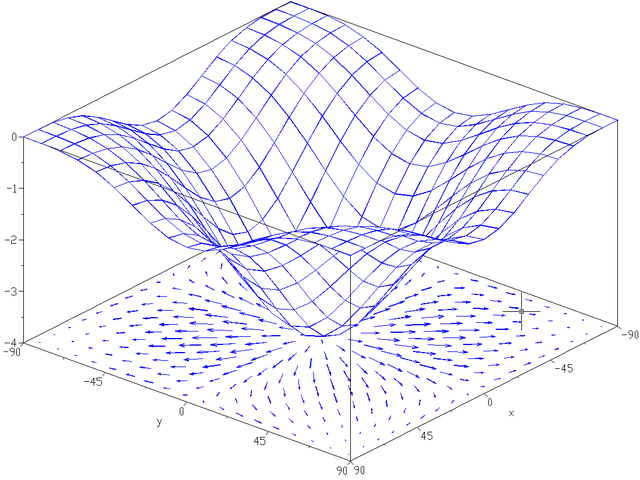

Batch gradient descent is an optimization algorithm commonly used in machine learning for minimizing the cost function of a model. It is a type of gradient descent that calculates the gradient of the cost function with respect to the model parameters using the entire training dataset at once.

In batch gradient descent, the parameters are updated in the opposite direction of the gradient with a step size determined by the learning rate. The algorithm continues to iteratively update the parameters until convergence, which is when the gradient becomes very close to zero, indicating that the model has reached a local minimum of the cost function.

##### Batch gradient descent has some disadvantages, including:

Computationally expensive: As batch gradient descent processes the entire training dataset at each iteration, it can be computationally expensive, especially when working with large datasets. This can result in slower convergence and longer training times.

Memory intensive: When working with large datasets, batch gradient descent requires a lot of memory to store the entire dataset in memory for each iteration. This can be a problem for machines with limited memory.

Can get stuck in local minima: Batch gradient descent can get stuck in local minima, which are suboptimal solutions of the cost function. This can result in the model not reaching the global minimum, which is the optimal solution.

Susceptible to outliers: Batch gradient descent is susceptible to outliers in the dataset, which can cause the algorithm to converge slowly or not at all. Outliers can have a significant impact on the cost function and can cause the algorithm to converge to a suboptimal solution.

Fixed learning rate: Batch gradient descent uses a fixed learning rate, which can result in the algorithm converging slowly or not at all. The learning rate determines the step size for each iteration, and if it is too large, the algorithm may overshoot the minimum, and if it is too small, the algorithm may converge slowly.

Overall, while batch gradient descent is a widely used optimization algorithm in machine learning, it has some limitations that need to be taken into consideration when selecting an optimization algorithm for a particular problem.

    According to Linear Regression formula for Y_predict is 
    y = mX + b for single variable 
    𝛽 is contain mutiple independent variable's so we stored the value of each independent variable in a matric's from
    𝛽_o = intercept_der
    𝛽_n = coef_der 


𝑦= 𝛽_𝑜+ 𝛽_1 𝑋_1+ 𝛽_2 𝑋_2+ 𝛽_𝑛 𝑋_𝑛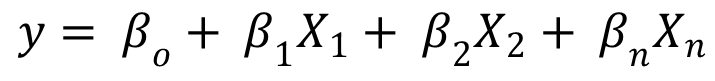

𝛽_𝜊=𝛽_𝑜− 𝜂𝑆𝑙𝑜𝑝
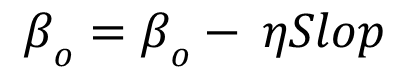


𝛽_𝑛=𝛽_𝑛− 𝜂𝑆𝑙𝑜𝑝
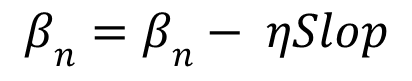

    Derivative the each equation

𝛽_𝑜𝑆𝑙𝑜𝑝=𝑑𝐿/𝑑𝑚= −2/𝑛  ∑1_(𝑖=1)^𝑛▒(𝑦_𝑖−𝑦 ̂ ) 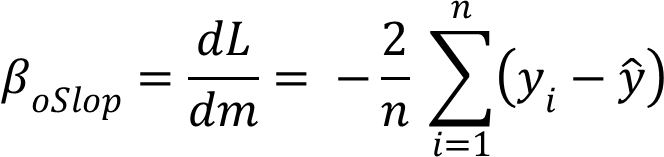

𝛽_𝑛𝑆𝑙𝑜𝑝=𝑑𝐿/𝑑𝑚= −2/𝑛  ∑1_(𝑖=1)^𝑛▒(𝑦_𝑖−𝑦 ̂ )  𝑋_𝑖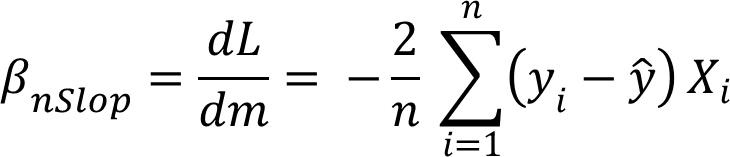



(𝑦_𝑛 ) ̂  = 𝛽_𝑜+ 𝛽_𝑛 𝑋_𝑛𝑚+ ..
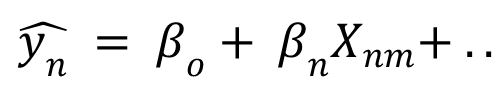

## Code for Batch Gradient Descent

In [12]:
# Load the diabetes data set
from sklearn.datasets import load_diabetes

X,y = load_diabetes(return_X_y=True)

In [13]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [15]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [16]:
print(reg.coef_)
print()
print(reg.intercept_)

[  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
  561.21453306  153.88478595  126.73431596  861.12139955   52.41982836]

151.88334520854633


In [17]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399387660024644

In [18]:
X_train.shape

(353, 10)

In [19]:
class GDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [20]:
gdr = GDRegressor(epochs=1000,learning_rate=0.5)
gdr.fit(X_train,y_train)

152.0135263267291 [  14.38915082 -173.72674118  491.54504015  323.91983579  -39.32680194
 -116.01099114 -194.04229501  103.38216641  451.63385893   97.57119174]


In [21]:
y_pred = gdr.predict(X_test)
r2_score(y_test,y_pred)

0.4534524671450598

# Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) is a popular optimization algorithm used in machine learning and deep learning for minimizing the cost function during the training of a model. It is a variant of gradient descent that updates the model parameters using a subset of the training data (a batch) rather than the entire dataset.

In stochastic gradient descent, the cost function is evaluated and the gradient is computed using a randomly selected subset of the training data. This subset is called a "mini-batch". The model parameters are then updated based on the gradient of the cost function with respect to the parameters and the learning rate, which determines the step size taken in the direction of the gradient.

The advantage of stochastic gradient descent over regular gradient descent is that it is much faster, especially for large datasets, since it only requires a small subset of the data to update the parameters. However, it can be less accurate than regular gradient descent since the noise introduced by the random sampling of the mini-batches can make the optimization process less stable. To mitigate this issue, techniques such as momentum, adaptive learning rate, and regularization are often used in combination with stochastic gradient descent.

While stochastic gradient descent (SGD) is a popular and widely-used optimization algorithm in machine learning, it does have some disadvantages compared to other optimization algorithms:

SGD can be sensitive to the learning rate: The learning rate determines the step size of the optimization algorithm, and finding the optimal learning rate can be challenging in SGD. A learning rate that is too small can result in slow convergence, while a learning rate that is too large can result in unstable behavior and oscillations.

SGD can be noisy: Since SGD updates the model parameters based on a random subset of the training data (a mini-batch), it introduces noise into the optimization process. This can lead to a less stable optimization and slower convergence.

SGD can get stuck in local minima: Like other optimization algorithms, SGD can get stuck in local minima and fail to converge to the global minimum of the cost function.

SGD requires careful tuning of hyperparameters: In addition to the learning rate, SGD also has other hyperparameters that need to be tuned carefully, such as the mini-batch size and the regularization strength.

SGD can be computationally expensive: Since SGD requires multiple passes over the training data to converge, it can be computationally expensive for large datasets, especially if the mini-batch size is small.

Despite these disadvantages, SGD remains a popular and powerful optimization algorithm for machine learning and deep learning, especially for large datasets and high-dimensional models. Many variants of SGD have been developed to address some of these issues, such as momentum, adaptive learning rates, and regularization.

While stochastic gradient descent (SGD) is a popular and widely-used optimization algorithm in machine learning, it does have some disadvantages compared to other optimization algorithms:

SGD can be sensitive to the learning rate: The learning rate determines the step size of the optimization algorithm, and finding the optimal learning rate can be challenging in SGD. A learning rate that is too small can result in slow convergence, while a learning rate that is too large can result in unstable behavior and oscillations.

SGD can be noisy: Since SGD updates the model parameters based on a random subset of the training data (a mini-batch), it introduces noise into the optimization process. This can lead to a less stable optimization and slower convergence.

SGD can get stuck in local minima: Like other optimization algorithms, SGD can get stuck in local minima and fail to converge to the global minimum of the cost function.

SGD requires careful tuning of hyperparameters: In addition to the learning rate, SGD also has other hyperparameters that need to be tuned carefully, such as the mini-batch size and the regularization strength.


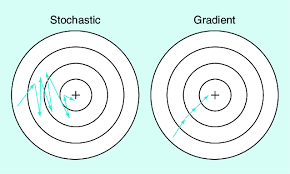

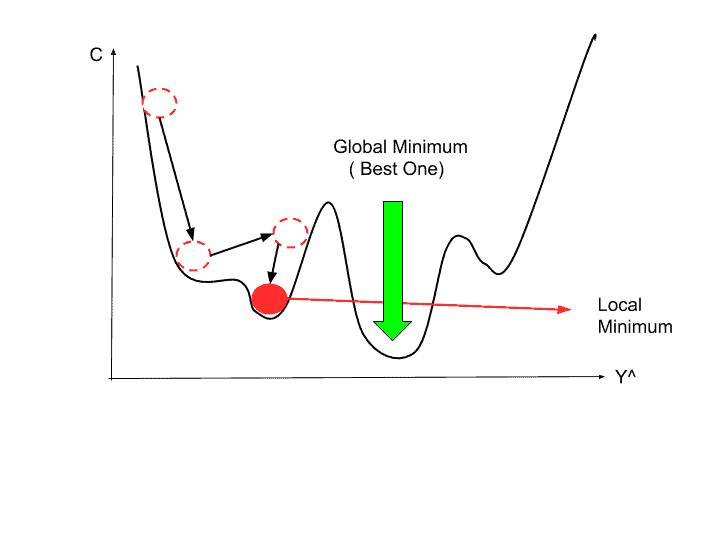

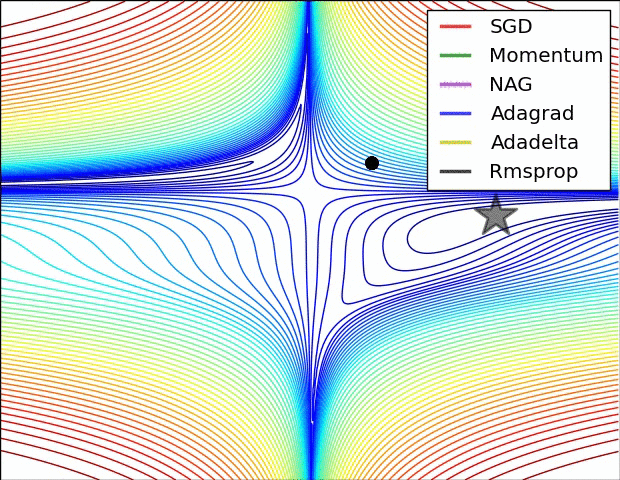

### Formula of Stochastic Gradient Descent
𝛽_𝜊 = intercept_
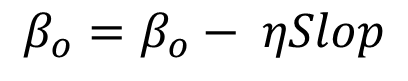
<!--  -->
𝛽_𝑛= Coef_
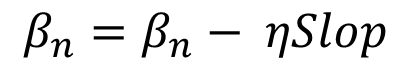

idx = random value Generated
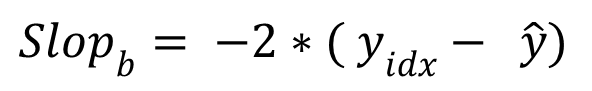

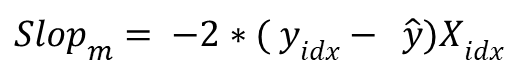

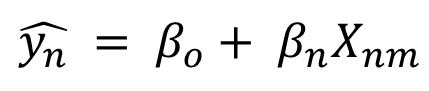

In [22]:
import time

# Stochastic Gradient Descent Code from Scatch

In [23]:
class SGDRegressor:
    def __init__(self,learning_rate=0.1,epochs=50):
        self.coef_ = None
        self.intercept = None
        self.learning_rate = learning_rate
        self.epochs = epochs
        print("__SGDRegressor__")
        
    def fit(self,X_train,y_train):
        
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            
            for i in range(X_train.shape[0]): 
                
                # Generating the random value 
                idx = np.random.randint(0,X_train.shape[0])
                
                # Y_hat value predicted value
#                 y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                
                # finding value of coef_
                intercept_der = -2 * ( y_train[idx] - y_hat )
                self.intercept_ = self.intercept_ - (self.learning_rate * intercept_der)
                
                # finding value of intercept 
                coef_der = -2 * (np.dot(( y_train[idx] - y_hat),X_train[idx]))
                self.coef_ = self.coef_ - (self.learning_rate * coef_der)
        print(f' coef_: {self.coef_} and intercept_: {self.intercept_}')
            
            
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_
        
        

In [24]:
sgd = SGDRegressor(learning_rate=0.01,epochs=40)

__SGDRegressor__


In [25]:
sgd.fit(X_train,y_train)

 coef_: [  63.83844931  -51.01575151  320.71589597  225.47406013   24.88824897
  -16.81648932 -165.58517176  128.23850896  295.43329637  130.14181989] and intercept_: 144.32444151322198


In [26]:
y_pred = sgd.predict(X_test)
r2_score(y_test,y_pred)

0.4120931025294453

# Library of Stochastic Gradient Descent 

In [27]:
# import stochastic GD
from sklearn.linear_model import SGDRegressor

In [28]:
reg = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)

In [29]:
reg.fit(X_train,y_train)

C:\Users\varva\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='constant', max_iter=100)

In [30]:
y_pred = reg.predict(X_test)

In [31]:
r2_score(y_test,y_pred)

0.4316527819610808

# Mini-batch Gradient Descent 

Mini-batch gradient descent is a variation of the gradient descent optimization algorithm used in machine learning for minimizing the cost function of a model. In traditional gradient descent, the cost function is minimized by computing the gradients of the cost function with respect to the model parameters on the entire training dataset. This can be computationally expensive for large datasets.

In mini-batch gradient descent, the training dataset is divided into small subsets or batches, and the gradient of the cost function is computed for each batch. The model parameters are then updated based on the average of the gradients computed over all the batches.

The batch size is a hyperparameter that determines the number of samples used in each batch. A smaller batch size means that the model parameters are updated more frequently, but the updates may have higher variance, whereas a larger batch size means that the updates are less frequent, but the updates may have lower variance.

Mini-batch gradient descent is a popular optimization algorithm in deep learning because it allows for efficient computation on large datasets and can lead to faster convergence of the model.

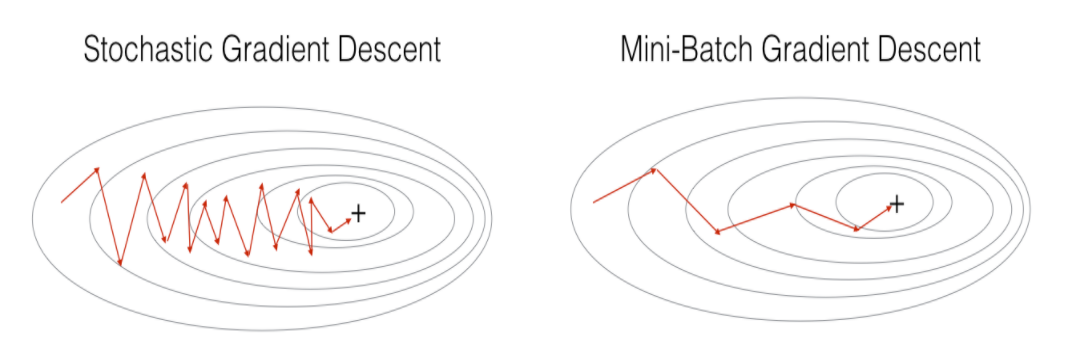

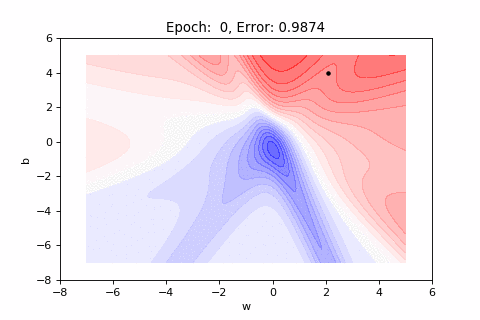

## Code for Mini-Batch Gradient Descent

In [32]:
import random

class MBGDRegressor:
    
    def __init__(self,batch_size,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            
            for j in range(int(X_train.shape[0]/self.batch_size)):
                
                idx = random.sample(range(X_train.shape[0]),self.batch_size)
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                #print("Shape of y_hat",y_hat.shape)
                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [33]:
mbr = MBGDRegressor(batch_size=int(X_train.shape[0]/50),learning_rate=0.01,epochs=100)

In [34]:
mbr.fit(X_train,y_train)

152.9934484882904 [  30.82184018 -145.65456363  452.67039304  311.05655491  -25.48448121
  -94.24684027 -191.87298048  105.13520217  410.45079931  105.44015436]


In [35]:
y_pred = mbr.predict(X_test)

In [42]:
r2_score(y_test,y_pred)

0.43100220394178035

## Another Method
Library in available in deep learning

In [37]:
from sklearn.linear_model import SGDRegressor

In [38]:
sgd = SGDRegressor(learning_rate='constant',eta0=0.1)

In [39]:
batch_size = 35

for i in range(100):
    
    idx = random.sample(range(X_train.shape[0]),batch_size)
    sgd.partial_fit(X_train[idx],y_train[idx])

In [40]:
y_pred = sgd.predict(X_test)
r2_score(y_test,y_pred)

0.43100220394178035

In [41]:
sgd.coef_

array([  49.25625108,  -75.2069577 ,  347.74045668,  246.99507361,
         24.23970455,  -24.03915395, -168.03344932,  130.35259052,
        326.09088356,  130.72987169])

# Difference Between Batch, stochastic, and mini-batch gradient descent

Batch, stochastic, and mini-batch gradient descent are all variations of the gradient descent optimization algorithm that are commonly used in machine learning. The key difference between these methods lies in the amount of data used to compute the gradient of the loss function at each iteration of the optimization process.

###### Batch gradient descent:
In batch gradient descent, the gradient of the loss function is computed using the entire dataset. This means that each iteration of the optimization process requires a pass through the entire dataset, which can be computationally expensive for large datasets. However, this approach often results in more stable convergence to the minimum of the loss function, since it uses a comprehensive view of the data.

###### Stochastic gradient descent: 
In stochastic gradient descent, the gradient of the loss function is computed using a single randomly selected data point (or instance) at each iteration of the optimization process. This approach can be faster than batch gradient descent for large datasets, but can also result in noisy gradients and slower convergence due to the high variance of each individual data point.

###### Mini-batch gradient descent:
In mini-batch gradient descent, the gradient of the loss function is computed using a small randomly selected subset (or batch) of the dataset at each iteration of the optimization process. This approach combines the benefits of both batch and stochastic gradient descent, resulting in a more stable convergence than stochastic gradient descent and faster convergence than batch gradient descent. The batch size is typically chosen based on computational constraints and the size of the dataset.

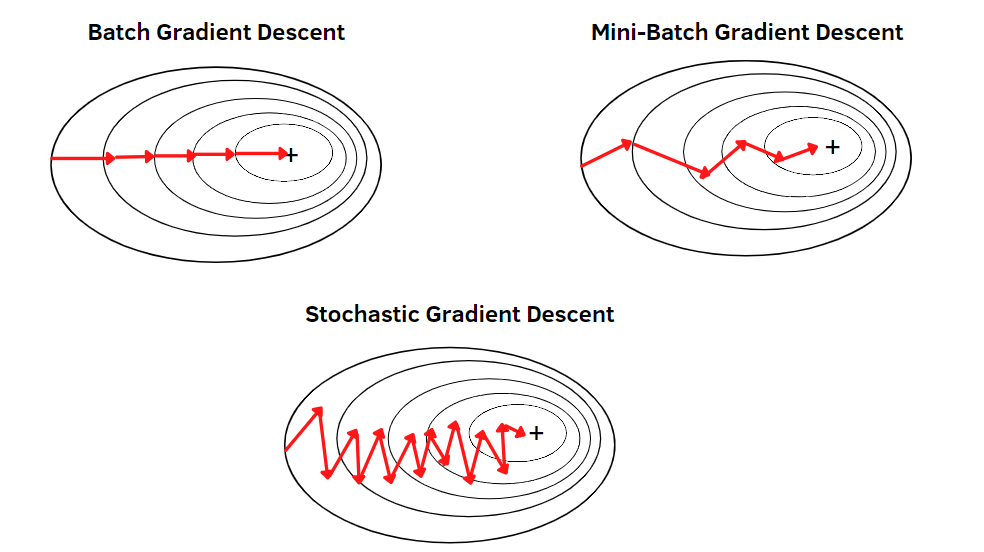